In [1]:
# Inspect data

words = open('names.txt').read().splitlines()

In [2]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
b = {}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # add Start and End tokens.
    for ch1, ch2 in zip(chs, chs[1:]): # zip the string with the same string but shifted by 1 to get the letter pairs.
        bigram = (ch1, ch2) # construct dict key
        b[bigram] = b.get(bigram, 0) + 1 # add 1 to value at [bigram] for each character tuple
        
print('\n')
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [5]:
# Sorted() returns a sorted list. dict.items() returns key-value pairs of the dictionary, as a list of tuples.
# Problem is, it sorts based on the first element of the tuples so we need to iterate through each touple at get the value
# so we can sort by that instead.
sorted(b.items(), key = lambda tuple: tuple[1], reverse = True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [7]:
len(set(''.join(words))) # Make a single string. Throw out dupes through building a set to figure out the number of letters used. 
                         # Result = 26, which is the number of letters in the English alphabet, so it's correct.

26

In [8]:
letters = sorted(list(set(''.join(words))))
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [9]:
print(list(enumerate(letters)), '\n')
stoi = {s:i for i,s in enumerate(letters)} # create mapping dictionary for each tuple of the form (index, element) returned by enumerate 
stoi['<S>'] = 26 # add Start and End token too
stoi['<E>'] = 27 
stoi
# len(stoi) 

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f'), (6, 'g'), (7, 'h'), (8, 'i'), (9, 'j'), (10, 'k'), (11, 'l'), (12, 'm'), (13, 'n'), (14, 'o'), (15, 'p'), (16, 'q'), (17, 'r'), (18, 's'), (19, 't'), (20, 'u'), (21, 'v'), (22, 'w'), (23, 'x'), (24, 'y'), (25, 'z')] 



{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [10]:
N = torch.zeros(len(stoi), len(stoi), dtype = torch.int32)
print('N.shape: ', N.shape)
print('len(N): ', len(N))

N.shape:  torch.Size([28, 28])
len(N):  28


In [11]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] 
    for ch1, ch2 in zip(chs, chs[1:]): 
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] += 1

## 1) Bigram model

In [12]:
# stoi.items()
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# import seaborn as sns

# test visualization options

DataFrame:
        a     b     c     d     e    f    g     h     i     j  ...     s  \
a     556   541   470  1042   692  134  168  2332  1650   175  ...  1118   
b     321    38     1    65   655    0    0    41   217     1  ...     8   
c     815     0    42     1   551    0    2   664   271     3  ...     5   
d    1303     1     3   149  1283    5   25   118   674     9  ...    29   
e     679   121   153   384  1271   82  125   152   818    55  ...   861   
f     242     0     0     0   123   44    1     1   160     0  ...     6   
g     330     3     0    19   334    1   25   360   190     3  ...    30   
h    2244     8     2    24   674    2    2     1   729     9  ...    31   
i    2445   110   509   440  1653  101  428    95    82    76  ...  1316   
j    1473     1     4     4   440    0    0    45   119     2  ...     7   
k    1731     2     2     2   895    1    0   307   509     2  ...    95   
l    2623    52    25   138  2921   22    6    19  2480     6  ...    94   
m

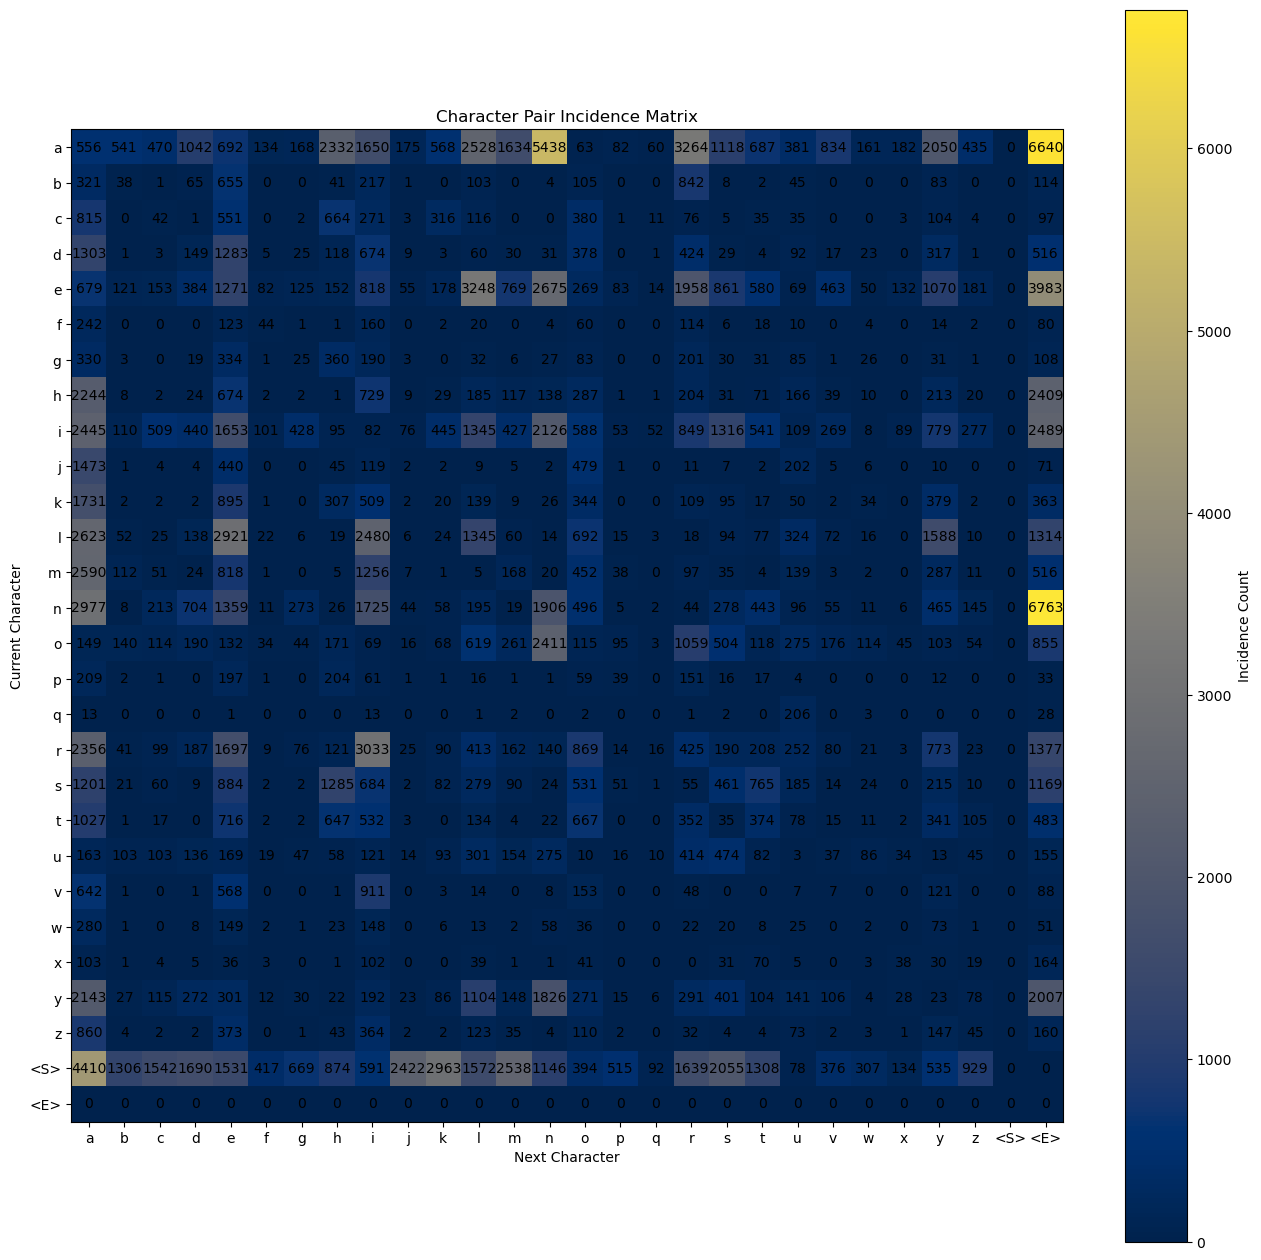

In [14]:
df = pd.DataFrame(N.numpy(), index=[itos[i] for i in range(len(itos))], columns=[itos[i] for i in range(len(itos))])
print("DataFrame:")
print(df)
# Visualization using pandas
plt.figure(figsize=(16, 16))
plt.title('Character Pair Incidence Matrix')

# Plotting each value
for i in range(len(df)):
    for j in range(len(df.columns)):
        plt.text(j, i, df.iloc[i, j], ha='center', va='center', color='black')

plt.imshow(df, cmap='cividis', interpolation='nearest')
plt.xticks(ticks=range(len(df.columns)), labels=df.columns)
plt.yticks(ticks=range(len(df.index)), labels=df.index)

plt.xlabel('Next Character')
plt.ylabel('Current Character')
plt.colorbar(label='Incidence Count')
plt.show()

In [15]:
# Noted: Having 2 separate special characters for Start and End gives empty data.

In [16]:
stoi = {s:i+1 for i,s in enumerate(letters)} # shift by 1 compared to before
stoi['.'] = 0 # add Start and End token too

itos = {i:s for s,i in stoi.items()}

print(stoi, '\n')
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0} 

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [17]:
N = torch.zeros(len(stoi), len(stoi), dtype = torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]): 
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1, ix2] += 1

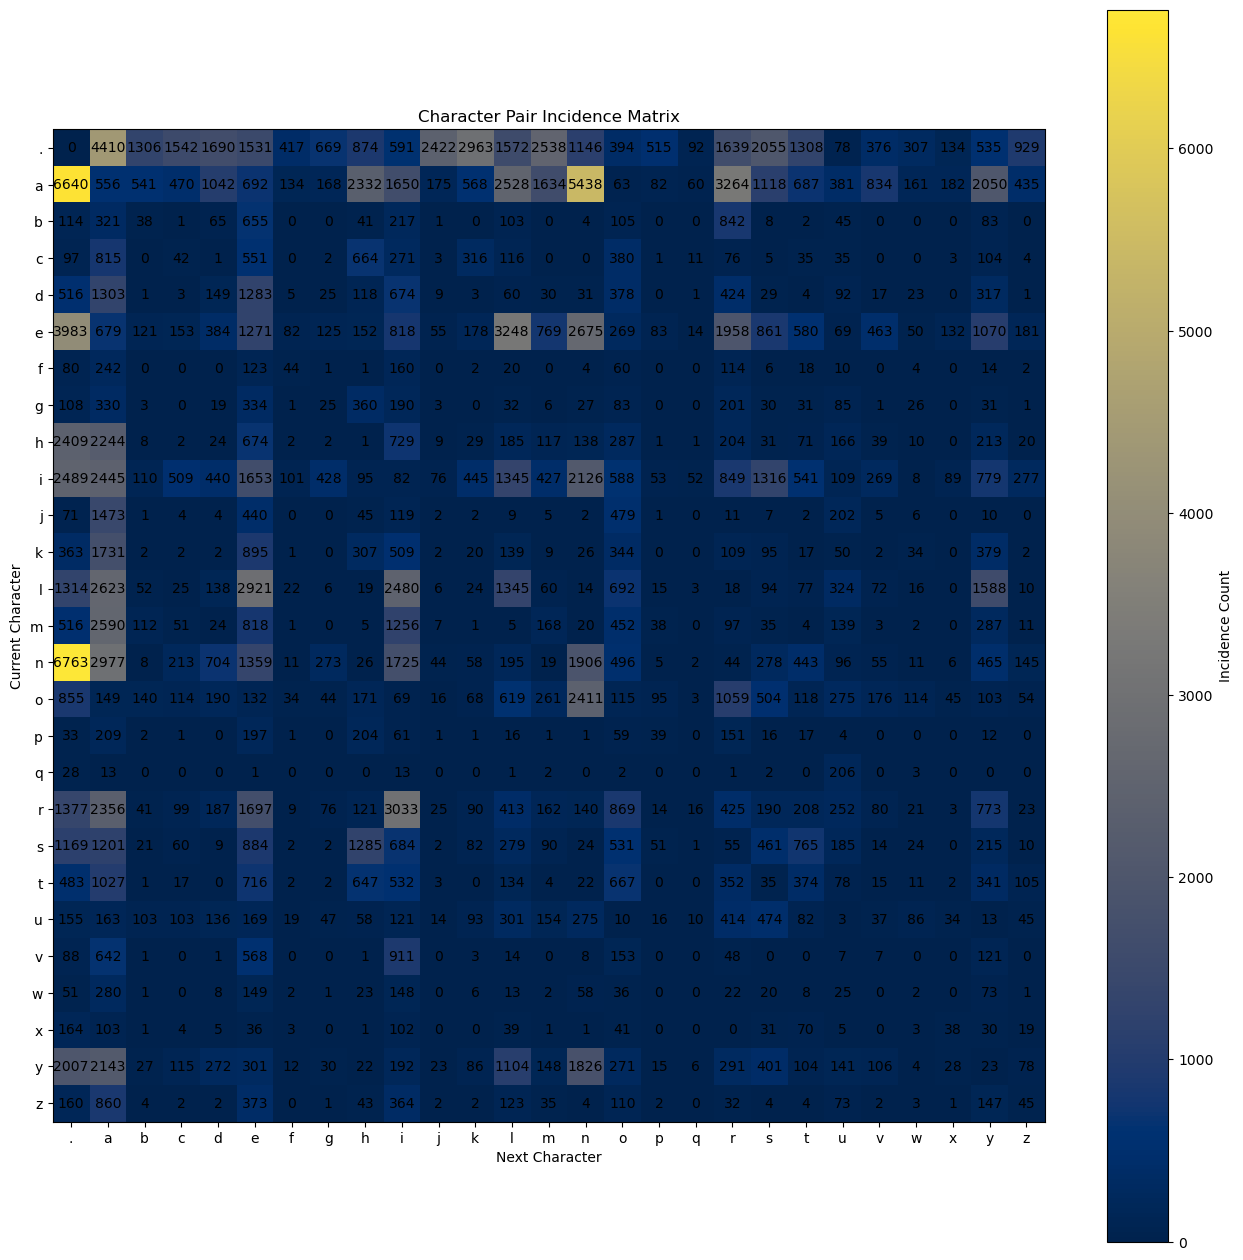

In [18]:
df = pd.DataFrame(N.numpy(), index=[itos[i] for i in range(len(itos))], columns=[itos[i] for i in range(len(itos))])
# print("DataFrame:")
# print(df)
# Visualization using pandas
plt.figure(figsize=(16, 16))
plt.title('Character Pair Incidence Matrix')

# Plotting each value
for i in range(len(df)):
    for j in range(len(df.columns)):
        plt.text(j, i, df.iloc[i, j], ha='center', va='center', color='black')

plt.imshow(df, cmap='cividis', interpolation='nearest')
plt.xticks(ticks=range(len(df.columns)), labels=df.columns)
plt.yticks(ticks=range(len(df.index)), labels=df.index)

plt.xlabel('Next Character')
plt.ylabel('Current Character')
plt.colorbar(label='Incidence Count')
plt.show()

In [19]:
p = N[0,:].float() # grab first row, which is the letter following the starting token
p = p/p.sum()   # normalize to get probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Broadcast semantics important considerations in the next cell:

In [20]:
# Create normalized tensor
P = (N+1).float()   # Add 1 to avoid any probability being 0 so we don't get infinite loss due to the log
                    # This is smoothing the probabilities since the bigger the number we add, the more we mask the true probabilities
                    # aka the more uniform the prbability distribution becomes
P = P / P.sum(dim=1, keepdim=True) 

# P.shape is 27,27
# P.sum(dim=1, keepdim=True).shape is 27,1
# Note: Broadcasting semantics. They define compatible operations (search torch documentation)
# What the operation does internally is to match the dimensions by copying/extending, for example with 1s
# and then does element-wise division.

# Careful! Torch aligns the trailing dimensions first. For example, the documentation says that: 

# Two tensors are “broadcastable” if the following rules hold:

# Each tensor has at least one dimension.

# When iterating over the dimension sizes, starting at the trailing dimension, 
# the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

# So you would think that an operation between the 27,27 tensor and the 27 list would work because
# one dimension is missing, but torch aligns this dimension like this:

# 27, 27
#     27

# and then augments it as such:

# 27, 27
#  1, 27        This operation results in a row vector that is then internally replicated along the rows! 
#               Meaning it is normalizing the columns!

# which is different from our earlier and correct operation:

# 27, 27
# 27, 1

Efficiency consideration in the next cell:

In [21]:
# P = N.float()
# P = P / P.sum(dim=1, keepdim=True) 

# VS

# P = N.float()
# P /= P.sum(dim=1, keepdim=True)

# In the first case, P = P / P.sum(dim=1, keepdim=True) creates a new tensor as a result of the division.
# Here, Python computes the sum of P along dim=1, maintains the dimensionality with keepdim=True, and then divides each element of P by this sum.
# A new tensor is allocated for the result of P / P.sum(...), and then P is updated to reference this new tensor.
# This involves more memory allocation because a new tensor is created and the old P is discarded.

# In the second case, P /= P.sum(dim=1, keepdim=True) modifies the tensor P in place.
# The /= operator performs the division on P itself, updating each element with the result, without creating a new tensor.
# This is more memory efficient because no additional tensor is created. The operation directly updates P, reducing the memory footprint.

# This means that under the hood, The in-place operation (/=) is more memory-efficient as it doesn't require storing an additional tensor TEMPORARILY. 
# In scenarios where P is very large, this difference becomes more significant.
# The in-place operation can also be slightly faster due to reduced overhead from memory allocation and garbage collection of the old tensor.

In [22]:
# Set prediction chain

g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0  # Always start at the start token, which has index 0
    while True:
        p = P[ix] # Grab row of the character at index ix we are currently on
        # p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

    # Note: if a uniform distribution is used instead, which makes every combination
    # equally likely, the model would be more nonsensical. This means that even a bigram
    # model is learning something from the probability distribution drawn from the
    # training data

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [23]:
# GOAL: Maximize likelihood (product of probabilities) of the data w.r.t model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (remember the log function graph)
# equivalent to minimizing the negative log likelihood (flipped log)
# equivalent to minimizing the average negative log likelihood

In [24]:
log_likelihood = 0.0
n = 0 # count factor for normalization

for w in ['emmanuele']:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]): 
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1, ix2] # fetch probability of the bigram from table
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f}  {logprob:.4f}')
print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n = }') # normalized negative log likelihood

.e: 0.0478  -3.0410
em: 0.0377  -3.2793
mm: 0.0253  -3.6753
ma: 0.3885  -0.9454
an: 0.1604  -1.8302
nu: 0.0053  -5.2429
ue: 0.0538  -2.9232
el: 0.1589  -1.8396
le: 0.2089  -1.5657
e.: 0.1948  -1.6357
log_likelihood = tensor(-25.9784)
nll = tensor(25.9784)
nll/n = tensor(2.5978)


In [25]:
log_likelihood = 0.0
n = 0 # count factor for normalization

for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]): 
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1, ix2] # fetch probability of the bigram from table
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n = }') # normalized negative log likelihood

log_likelihood = tensor(-559951.5625)
nll = tensor(559951.5625)
nll/n = tensor(2.4544)


## 2) Neural net implementation

In [26]:
# Create training datasets (x,y) - example for 1 sample

xs, ys = [], []

for w in words[:1]: # same as words[0] or words[0:1]
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]): 
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        print(ch1, ch2)

        xs.append(ix1)
        ys.append(ix2)  # Following character (the one to predict) - remember ix1 and ix2 are integers encoding the letters (strings)

xs = torch.tensor(xs)
ys = torch.tensor(ys) # Careful with the difference between torch.tensor and torch.Tensor, the former infers the dtype while the second casts it to float

. e
e m
m m
m a
a .


In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
# Randomly initialize 27 neurons' weights 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [30]:
import torch.nn.functional as F

# Input to the network through one hot encoding
x_enc = F.one_hot(xs, num_classes=27).float() # The dtype returned by F.one_hot is integer, 
                                              # so we need to cast it to float to function correctly as input for the NN.

# Predict log-counts 
# (They are called this way in order to interpret them appropriately. This way we can interpret the exponentiation as giving the counts, similar to
# the N matrix of the bigram model)
logits = x_enc @ W # @ is torch syntax for matrix multiplication

counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # normalization to get probabilities for the next character 
# These last 2 lines are exactly the low level implementation of the Softmax function.

In [31]:
probs.shape

torch.Size([5, 27])

In [32]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes ({x}, {y}))')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    print('----------')

print('average negative log likelihood, i.e., loss =', nlls.mean().item())


bigram example 1: .e (indexes (0, 5))
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
----------
bigram example 2: em (indexes (5, 13))
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0.018050700

In [33]:
probs[torch.arange(5), ys] # Check probabilities assigned to the correct character that should have been predicted to come next based on the labels ys

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [34]:
loss = -probs[torch.arange(5), ys].log().mean() # average neg log likelihood
loss

tensor(3.7693)

##### NN Weight Optimization

In [35]:
# Initialization
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True) # requires_grad=True needed to inform pytorch we are interested in the grads later

In [36]:
# Forward pass
x_enc = F.one_hot(xs, num_classes=27).float() 
logits = x_enc @ W
counts = logits.exp() 
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean() 

In [37]:
print(loss.item())

3.7693049907684326


In [38]:
# Backward pass
W.grad = None # more efficient in pytorch than setting the initial gradients to 0, but functionally the same
loss.backward() # https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
# PyTorch internally keeps a log of the operations performed as a computational graph to then calculate the gradients 

In [39]:
# Update step
W.data += -0.1 * W.grad # remember here that 0.1 is the learning rate and the "-" is to move against the gradient to lower the loss

In [40]:
# Check effect of update step

# Run another forward pass and calculate the loss
x_enc = F.one_hot(xs, num_classes=27).float() 
logits = x_enc @ W
counts = logits.exp() 
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean() 

In [41]:
print(loss.item()) # Loss has decreased

3.7492127418518066


## Code clean up

In [42]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples: 228146


In [43]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
    logits = xenc @ w  # predict log_counts
    counts = logits.exp()  # equivalent to N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean()  # loss calculation
    print(loss.item())

    # backward pass
    w.grad = None  # set to zero the gradient
    loss.backward()

    # update
    w.data += -50 * w.grad

3.758953809738159
3.371098756790161
3.1540417671203613
3.020373821258545
2.9277119636535645
2.860402822494507
2.8097293376922607
2.7701027393341064
2.7380733489990234
2.711496591567993
2.6890034675598145
2.6696884632110596
2.6529300212860107
2.638277292251587
2.6253881454467773
2.6139907836914062
2.603863477706909
2.5948219299316406
2.586712121963501
2.57940411567688
2.572789192199707
2.5667762756347656
2.5612881183624268
2.5562589168548584
2.551633596420288
2.547365665435791
2.5434155464172363
2.539748430252075
2.5363364219665527
2.5331544876098633
2.5301806926727295
2.5273969173431396
2.5247862339019775
2.522334575653076
2.520029067993164
2.517857789993286
2.515810966491699
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056610107421875
2.5042612552642822
2.502929210662842
2.5016613006591797
2.5004522800445557
2.4992990493774414
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942495822906494
2.493363380432129
2

In [44]:
# Result: The bigram model and the neural net used are so simple that the loss achieved through simple counting is enough

# Note: That is because our neural net only had 1 layer, meaning the NN only has knowledge of the immediately previous character when predicting the
#       next one, but no information on any earlier characters that are making up the composed name, which is why it produces almost nonsensical names by 
#       forming almost nonsensical sequences. 


# Note: The multiplication of the weight matrix W with the one-hot encoded vectors essentially functions as a lookup of the probability 
#       of that combination of characters due to how matrix multiplication works, which is the same thing that was done with the table N.
#       The difference is that W was randomly initialized and the loss guided the random values to the count probabilities through the loss.


# Note: Just as in "P = (N+1).float()", the NN also achieves smoothing by setting all the initial entries of W to be close to 0, which results in
#       a somewhat uniform probability distribution. This can be incentivized in the loss, and is what REGULARIZATION is!

In [45]:
# Inference
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    
    out = []
    ix = 0
    while True:
        ###########################
        # BEFORE:
        # p = P[ix]
        ###########################
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


ouwjdjdjawccadjufhqyywednw.
.
oiinwtoziaszwtwt.
ydaxjiauydbbleviajsdbduinrwipblvszwygnbyt.
otblufrmumkhyfodtumjmpgniszwjqrzafqyhogdaygezocckkpjabwtwtdkmriibwyfinwtgcasnhsvfbmofbuxhddgogfbptpasilu.


In [46]:
# Note: The results of the simple bigram model and the NN bigram model should be very similar. 
#       In this case they are not because later pytorch versions changed how the "multinomial" function works.